In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
#represents the alphabets of Western European languages
df = pd.read_csv("/content/IMDb Movies India.csv", encoding = 'latin-1')

In [ ]:
df.shape

(15509, 10)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [ ]:
df.isnull().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [ ]:
df.describe()

,Rating
count,7919.000000
mean,5.841621
std,1.381777
min,1.100000
25%,4.900000
50%,6.000000
75%,6.800000
max,10.000000


<Axes: >

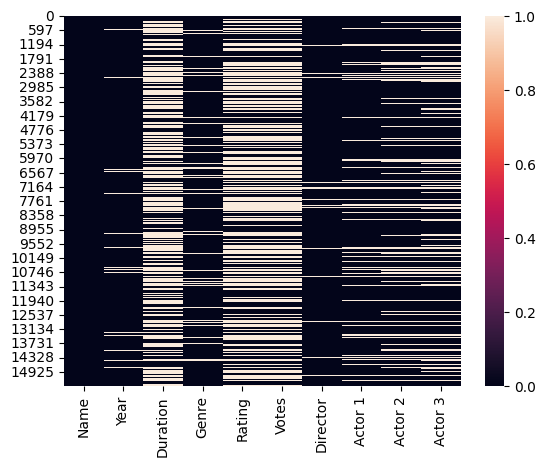

In [ ]:
sns.heatmap(df.isnull())


In [ ]:
#Locating rows with missing values
df[df.isnull().any(axis=1)]

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
7,.in for Motion,(2008),59 min,Documentary,NaN,NaN,Anirban Datta,NaN,NaN,NaN
14,101 Ratein,(1990),NaN,Thriller,NaN,NaN,Harish,Saraswati,Disco Shanti,NaN
...,...,...,...,...,...,...,...,...,...,...
15501,Zulm Ki Hukumat,(1992),NaN,"Action, Crime, Drama",5.3,135,Bharat Rangachary,Dharmendra,Moushumi Chatterjee,Govinda
15502,Zulm Ki Pukar,(1979),NaN,Action,NaN,NaN,Dinesh-Ramanesh,Ramesh Puri,Jalal Agha,Valerie Agha
15504,Zulm Ko Jala Doonga,(1988),NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15506,Zulmi Raj,(2005),NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN


In [ ]:
#Checking duplicate values by name and Year
df.duplicated().sum()


6

In [ ]:
duplicate = df.groupby(['Name', 'Year']).filter(lambda x: len(x) > 1)
duplicate.head(5)


,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
135,A Ballad of Maladies,(2016),86 min,"Documentary, Music",NaN,NaN,Sarvnik Kaur,Tushar Madhav,NaN,NaN
136,A Ballad of Maladies,(2016),86 min,"Documentary, History, Music",NaN,NaN,Sarvnik Kaur,Tushar Madhav,NaN,NaN
585,Achanak,(1988),NaN,Thriller,NaN,NaN,Rakesh Kashyap,Om Puri,Kunickaa Sadanand,Kanwaljit Singh
586,Achanak,(1988),NaN,Drama,NaN,NaN,Kavi Raz,Alka,Amarjeet Kaur,Kavi Raz
953,Amrit,(1941),153 min,NaN,NaN,NaN,Master Vinayak,Dada Salvi,Baburao Pendharkar,Lalita Pawar


In [ ]:
# Import the Plotly Express module
import plotly.express as px

# Create histogram plot using Plotly Express
fig_year = px.histogram(df, x='Year', histnorm='probability density', nbins=30, color_discrete_sequence=['#1f77b4'])
fig_year.update_traces(selector=dict(type='histogram'))
fig_year.update_layout(
    title='Distribution of Year',
    title_x=0.5,
    title_pad=dict(t=20),
    title_font=dict(size=20),
    xaxis_title='Year',
    yaxis_title='Probability Density',
    xaxis=dict(showgrid=False),
    yaxis=dict(showgrid=False),
    bargap=0.02,
    plot_bgcolor='white'
)

In [ ]:
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

In [ ]:
#Distribution according to rating
fig_rating = px.histogram(df, x = 'Rating', histnorm='probability density', nbins = 40, color_discrete_sequence = colors)
fig_rating.update_traces(selector=dict(type='histogram'))
fig_rating.update_layout(title='Distribution of Rating', title_x=0.5, title_pad=dict(t=20), title_font=dict(size=20), xaxis_title='Rating', yaxis_title='Probability Density', xaxis=dict(showgrid=False), yaxis=dict(showgrid=False), bargap=0.02, plot_bgcolor = 'white')
fig_rating.show()

In [ ]:
df.drop('Name', axis = 1, inplace = True)

In [ ]:
# Grouping the columns with their average rating and then creating a new feature

genre_mean_rating = df.groupby('Genre')['Rating'].transform('mean')
df['Genre_mean_rating'] = genre_mean_rating

director_mean_rating = df.groupby('Director')['Rating'].transform('mean')
df['Director_encoded'] = director_mean_rating

actor1_mean_rating = df.groupby('Actor 1')['Rating'].transform('mean')
df['Actor1_encoded'] = actor1_mean_rating

actor2_mean_rating = df.groupby('Actor 2')['Rating'].transform('mean')
df['Actor2_encoded'] = actor2_mean_rating

actor3_mean_rating = df.groupby('Actor 3')['Rating'].transform('mean')
df['Actor3_encoded'] = actor3_mean_rating

In [ ]:
# Keeping the predictor and target variable

X = df[[ 'Year', 'Votes', 'Duration', 'Genre_mean_rating','Director_encoded','Actor1_encoded', 'Actor2_encoded', 'Actor3_encoded']]
y = df['Rating']

In [ ]:
# Splitting the dataset into training and testing parts
from sklearn.model_selection import train_test_split, cross_val_score
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=20)

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)
lr_pred = lr.predict(X_test)

In [ ]:
data = {'Year': [2010], 'Votes': [11002], 'Duration': [221], 'Genre_mean_rating': [6.4], 'Director_encoded': [6.5], 'Actor1_encoded': [6.9], 'Actor2_encoded': [6.8], 'Actor3_encoded': [5.700]}
df = pd.DataFrame(data)

In [ ]:
predicted_rating_lr = rf.predict(df)

# Display the predicted rating
print("Predicted Rating:", predicted_rating_lr[0])